In [3]:
from random import randint

def gencoordinates(m, n1,n2):
    seen = set()

    x, y = randint(m, n1), randint(m, n2)

    while True:
        seen.add((x, y))
        yield (x, y)
        x, y = randint(m, n1), randint(m, n2)
        while (x, y) in seen:
            x, y = randint(m, n1), randint(m, n2)

In [29]:
nsubtlety, nstatpos, ncolor = 6,2,2 # recollapses with have same start position
variants = 3
nrequired_vids = nsubtlety*nstatpos * ncolor *variants
nrequired_vids

72

loop order: subtlety variations, initpos variations, color variations

In [30]:
world = [1200,900]
g = gencoordinates(0, world[0],world[1])
coords = []
for i in range(nrequired_vids):
    coords.append(next(g))

In [33]:
coords_array = np.array(coords)

546.1666666666666

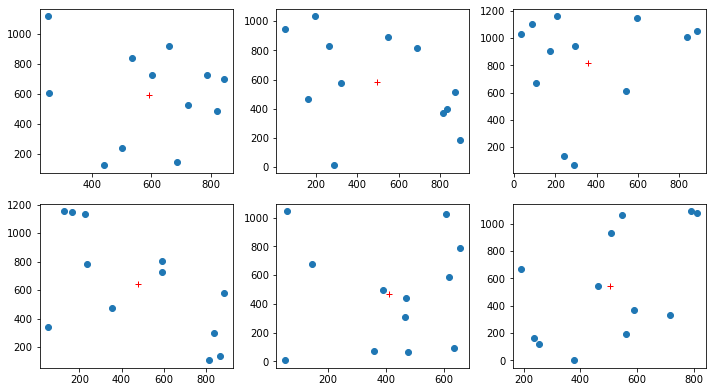

In [39]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(1,figsize=(10,8))
for subt in range(6):
    plt.subplot(3,3,subt+1)
    rows = np.arange((subt-1)*12,subt*12)
    plt.plot(coords_array[rows,1],coords_array[rows,0], ls = 'None',marker = 'o')
    plt.plot(coords_array[rows,1].mean(),coords_array[rows,0].mean(),color='r',marker = '+')
plt.tight_layout()

In [40]:
#import csv
import json

data = {}
data['x'] = list(coords_array[:,0])
data['x'] = [int(i) for i in data['x']]
data['y'] = list(coords_array[:,1])
data['y'] = [int(i) for i in data['y']]

json_data = json.dumps(data)
print(json_data)

{"x": [889, 399, 832, 947, 1036, 575, 814, 511, 184, 367, 12, 465, 903, 1034, 945, 1104, 67, 1006, 615, 668, 1163, 1149, 136, 1055, 725, 475, 803, 785, 135, 1146, 301, 1132, 344, 108, 1154, 579, 789, 584, 1044, 499, 675, 68, 76, 93, 443, 8, 308, 1022, 1066, 1091, 329, 1, 165, 665, 1077, 197, 543, 120, 929, 371, 145, 486, 724, 703, 238, 724, 607, 1120, 526, 917, 838, 125], "y": [550, 833, 263, 50, 194, 320, 690, 870, 898, 815, 289, 161, 173, 35, 295, 85, 293, 839, 545, 106, 207, 594, 244, 886, 592, 353, 594, 237, 870, 167, 839, 228, 53, 817, 127, 887, 657, 617, 58, 391, 143, 475, 359, 635, 469, 51, 467, 608, 546, 791, 715, 376, 238, 192, 810, 562, 462, 254, 508, 589, 686, 821, 786, 844, 502, 602, 256, 254, 723, 658, 535, 440]}


In [45]:
len(data['x'])

72

In [46]:
with open('mimic_start_position.json', 'w') as outfile:
    json.dump(json_data, outfile)

In [22]:
x = iter({'a','b','c'})
print(next(x))

c


In [ ]:
import csv
with open('mimic_start_position.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['x','y'])
    for row in coords:
        csv_out.writerow(row)